In [1]:
import pandas as pd

timestamps_data = pd.read_csv('../siwsi-lol-matches-predictions/timestamps_ext.csv')

In [16]:
!pip install regex

     -------------------------------------- 269.0/269.0 KB 1.5 MB/s eta 0:00:00


You should consider upgrading via the 'E:\Users\qesterius\Documents\Studia\sztuczna-inteligencja-w-systemach-inf\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
import regex as re

reg = re.compile(r'p.*_(.*)')

player_cols = [ col for col in timestamps_data.columns if reg.match(col) ]
others = [ col for col in timestamps_data.columns if not reg.match(col) ]

unplayer_cols = set([ reg.match(col).group(1) for col in player_cols ])


['matchId', 'timeStamp', 'gameDuration', 'percentTimeStamp']
{'movementSpeed', 'lifesteal', 'power', 'armorPenPercent', 'powerRegen', 'powerMax', 'currentGold', 'attackDamage', 'healthRegen', 'magicPenPercent', 'totalDamageTaken', 'magicDamageDone', 'bonusMagicPenPercent', 'armor', 'totalGold', 'trueDamageDone', 'cooldownReduction', 'jungleMinionsKilled', 'physicalVamp', 'participantId', 'trueDamageDoneToChampions', 'physicalDamageDoneToChampions', 'level', 'magicDamageDoneToChampions', 'physicalDamageTaken', 'timeEnemySpentControlled', 'magicDamageTaken', 'bonusArmorPenPercent', 'goldPerSecond', 'healthMax', 'omnivamp', 'magicResist', 'spellVamp', 'magicPen', 'attackSpeed', 'minionsKilled', 'physicalDamageDone', 'totalDamageDone', 'totalDamageDoneToChampions', 'championId', 'health', 'trueDamageTaken', 'abilityHaste', 'armorPen', 'abilityPower', 'xp', 'ccReduction'}


Following features for each player had been collected

In [23]:
print(unplayer_cols)

{'movementSpeed', 'lifesteal', 'power', 'armorPenPercent', 'powerRegen', 'powerMax', 'currentGold', 'attackDamage', 'healthRegen', 'magicPenPercent', 'totalDamageTaken', 'magicDamageDone', 'bonusMagicPenPercent', 'armor', 'totalGold', 'trueDamageDone', 'cooldownReduction', 'jungleMinionsKilled', 'physicalVamp', 'participantId', 'trueDamageDoneToChampions', 'physicalDamageDoneToChampions', 'level', 'magicDamageDoneToChampions', 'physicalDamageTaken', 'timeEnemySpentControlled', 'magicDamageTaken', 'bonusArmorPenPercent', 'goldPerSecond', 'healthMax', 'omnivamp', 'magicResist', 'spellVamp', 'magicPen', 'attackSpeed', 'minionsKilled', 'physicalDamageDone', 'totalDamageDone', 'totalDamageDoneToChampions', 'championId', 'health', 'trueDamageTaken', 'abilityHaste', 'armorPen', 'abilityPower', 'xp', 'ccReduction'}


Each record is also identified by following

In [24]:
print(others)

['matchId', 'timeStamp', 'gameDuration', 'percentTimeStamp']


In [25]:
timestamps_data[others].head()

,matchId,timeStamp,gameDuration,percentTimeStamp
0,EUW1_6882416210,0,1623,0.000000
1,EUW1_6882416210,2,1623,0.073937
2,EUW1_6882416210,4,1623,0.147874
3,EUW1_6882416210,6,1623,0.221811
4,EUW1_6882416210,8,1623,0.295749


In [ ]:
matches_ids = timestamps_data['matchId'].unique()

Building seperate dataframes for match data at 0% 30% 60% 70% 80% 100% 

In [32]:
timestamps_starting = timestamps_data[timestamps_data['timeStamp'] == 0]

#for each match_id row with timestamp value closest to 0.3
timestamps_30p = timestamps_data.loc[timestamps_data.groupby('matchId')['percentTimeStamp'].apply(lambda x: (x - 0.3).abs().idxmin()) ]
timestamps_60p = timestamps_data.loc[timestamps_data.groupby('matchId')['percentTimeStamp'].apply(lambda x: (x - 0.6).abs().idxmin()) ]
timestamps_80p = timestamps_data.loc[timestamps_data.groupby('matchId')['percentTimeStamp'].apply(lambda x: (x - 0.8).abs().idxmin()) ]
timestamps_100p = timestamps_data.loc[timestamps_data.groupby('matchId')['percentTimeStamp'].apply(lambda x: (x - 1.0).abs().idxmin()) ]


In [31]:
timestamps_30p.head()

,matchId,timeStamp,p1_currentGold,p2_currentGold,p3_currentGold,p4_currentGold,p5_currentGold,p6_currentGold,p7_currentGold,p8_currentGold,...,p2_championId,p3_championId,p4_championId,p5_championId,p6_championId,p7_championId,p8_championId,p9_championId,p10_championId,percentTimeStamp
181593,EUN1_3352148551,10,591,754,190,1592,658,1275,1575,379,...,254,711,236,350,2,9,103,145,902,0.290698
181577,EUN1_3398662585,8,810,655,1126,1128,733,381,60,1088,...,33,145,29,267,887,120,81,523,902,0.289680
268651,EUN1_3485904588,10,654,391,458,266,34,617,353,97,...,141,134,221,79,90,64,24,29,412,0.280112
268632,EUN1_3485954312,12,1329,1754,97,728,202,601,95,743,...,141,157,29,117,86,57,38,145,111,0.320856
268612,EUN1_3486589707,10,7,216,844,2332,1038,1086,276,1532,...,57,38,145,117,83,32,134,29,26,0.282486


Training: idea to start with records that are above 80% of completion and further train with lower learning rate on earlier timestamps 

In [3]:
target = pd.read_csv('../siwsi-lol-matches-predictions/first_win.csv')

In [4]:
timestamps_data.head()

,matchId,timeStamp,p1_currentGold,p2_currentGold,p3_currentGold,p4_currentGold,p5_currentGold,p6_currentGold,p7_currentGold,p8_currentGold,...,p1_damageStats_trueDamageTaken,p2_damageStats_trueDamageTaken,p3_damageStats_trueDamageTaken,p4_damageStats_trueDamageTaken,p5_damageStats_trueDamageTaken,p6_damageStats_trueDamageTaken,p7_damageStats_trueDamageTaken,p8_damageStats_trueDamageTaken,p9_damageStats_trueDamageTaken,p10_damageStats_trueDamageTaken
0,EUW1_6882416210,0,500,500,500,500,500,500,500,500,...,0,0,0,0,0,0,0,0,0,0
1,EUW1_6882416210,2,63,96,42,91,49,68,111,105,...,0,0,0,0,0,61,0,0,0,0
2,EUW1_6882416210,4,248,196,546,983,105,758,237,672,...,138,80,0,0,22,318,29,0,0,0
3,EUW1_6882416210,6,454,213,721,53,135,1075,222,571,...,258,80,0,0,22,471,209,0,0,40
4,EUW1_6882416210,8,410,841,94,1386,708,1076,773,166,...,709,80,0,56,22,719,209,0,0,40


In [5]:
target.columns = ['matchId', 'first_win']

In [6]:
data = timestamps_data.merge(target, on='matchId')

In [7]:
data.shape

(363982, 463)

In [20]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(461, 1000),
            nn.ReLU(),
            nn.Linear(1000, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.layers(x)

model = MLP()
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
#split data
from sklearn.model_selection import train_test_split
import torch

Y = data['first_win']
X = data.drop(columns=['matchId', 'first_win'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32)

from torch.utils.data import DataLoader, TensorDataset

training_data = TensorDataset(X_train, Y_train)
test_data = TensorDataset(X_test, Y_test)

Epoch 1/5 Loss: 0.08251339705277741
Epoch 2/5 Loss: 0.08134504982077294
Epoch 3/5 Loss: 0.08141123055081213
Epoch 4/5 Loss: 0.08220361052960065
Epoch 5/5 Loss: 0.08219645586139396


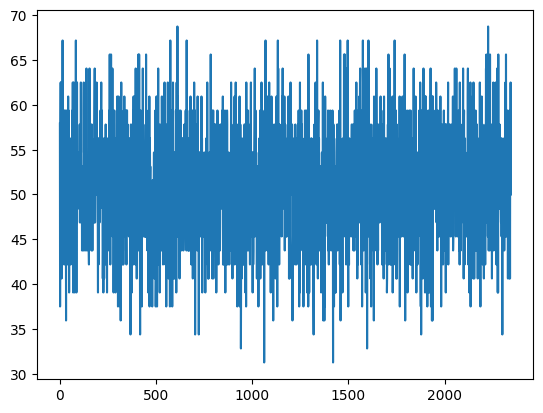

In [33]:
import matplotlib.pyplot as plt

epochs = 5
epoch_loss = []
lloss_h = []
criterion = nn.BCELoss()
for epoch in range(epochs):
    loss_history = []
    model.train()
    
    for x, y in DataLoader(training_data, batch_size=64, sampler=torch.utils.data.RandomSampler(training_data, replacement=True, num_samples=30000)):
        optimizer.zero_grad()   
        output = model(x).flatten()
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())
    
    lloss_h.extend(loss_history)
    epoch_loss.append(sum(loss_history)/len(training_data))
    print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss[-1]}') 
    
plt.plot(lloss_h)

In [28]:
accurate

2299808

In [32]:
accurate = 0
for x, y in DataLoader(test_data, batch_size=64, shuffle=True):
    output = model(x).flatten()
    output = torch.round(output)
    accurate += (output == y).sum().item()
print(f'Accuracy: {accurate/len(test_data)}')

Accuracy: 0.49249282250642196
